In [15]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from Assignment2 import ParticleSystem #import ParticleSystem class from Assignment2.py

Text(0.5, 1.0, 'Oscillation of two particles')

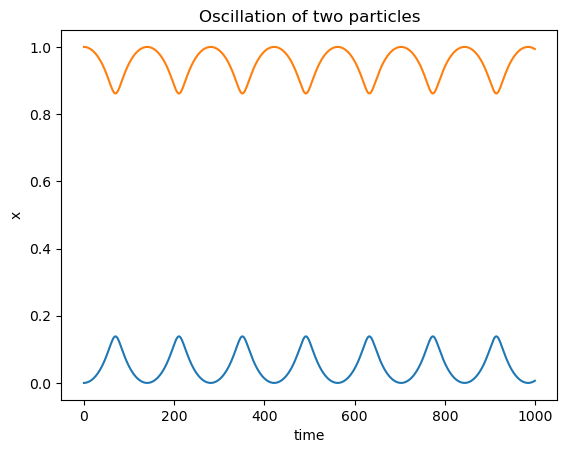

In [12]:
num_particles = 2 # Number of particles
dim = 3 # Dimensionality of the space
dt = 0.01 # Time step
num_steps = 1000 # Number of simulation steps
L = np.array([100, 100, 100]) # Size of the simulation box

particle_system = ParticleSystem(num_particles, dim, dt, num_steps, L) # Create a ParticleSystem object with specified parameters
initial_positions = np.array([[0.0, 0.0, 0.0], [1.0, 1.0, 0.0]]) # Initialize particle positions
particle_system.initialize_particles(initial_positions)

new_pos = particle_system.simulate() # Run the simulation to obtain new particle positions

part1 = new_pos[:, 0, 0] # Positions of Particle 1
part2 = new_pos[:, 1, 0] # Positions of Particle 2

fig, ax = plt.subplots() # Plot the oscillation of particles over time
ax.plot(np.arange(0, num_steps), part1, label="Particle 1")
ax.plot(np.arange(0, num_steps), part2, label="Particle 2")
ax.set_xlabel("time")
ax.set_ylabel("x")
ax.set_title("Oscillation of two particles")

Text(0.5, 1.0, 'Rebound of a particle against a barrier')

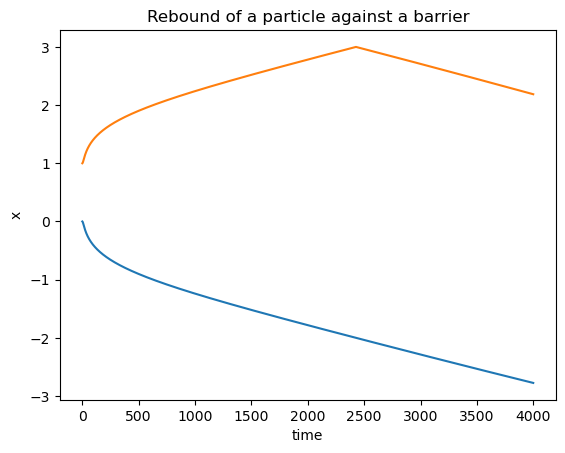

In [13]:
num_steps = 4000 # Number of simulation steps
L = np.array([6, 6, 6]) # Size of the simulation box

particle_system = ParticleSystem(num_particles, dim, dt, num_steps, L) # Create a ParticleSystem object with specified parameters
initial_positions = np.array([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0]]) # Initial positions of particles
particle_system.initialize_particles(initial_positions)

new_pos = particle_system.simulate() # Run the simulation to obtain new particle positions

part1 = new_pos[:, 0, 0]# Positions of Particle 1
part2 = new_pos[:, 1, 0]# Positions of Particle 2

fig, ax = plt.subplots() # Plot the rebound of particles against a barrier over time
ax.plot(np.arange(0, num_steps), part1, label="Particle 1")
ax.plot(np.arange(0, num_steps), part2, label="Particle 2")
ax.set_xlabel("time")
ax.set_ylabel("x")
ax.set_title("Rebound of a particle against a barrier")

[(5, 6.01964615638487e+24, 1.675518568615189e-14)]
[(5, 6.01964615638487e+24, 1.675518568615189e-14), (10, 6.67070713703704e+24, 4.641830929249689e-15)]
[(5, 6.01964615638487e+24, 1.675518568615189e-14), (10, 6.67070713703704e+24, 4.641830929249689e-15), (15, 6.670707138831021e+24, 2.0630510459846223e-15)]
[(5, 6.01964615638487e+24, 1.675518568615189e-14), (10, 6.67070713703704e+24, 4.641830929249689e-15), (15, 6.670707138831021e+24, 2.0630510459846223e-15), (20, 6.670707139698165e+24, 1.1604757885477683e-15)]
[(5, 6.01964615638487e+24, 1.675518568615189e-14), (10, 6.67070713703704e+24, 4.641830929249689e-15), (15, 6.670707138831021e+24, 2.0630510459846223e-15), (20, 6.670707139698165e+24, 1.1604757885477683e-15), (25, 6.670707139796738e+24, 7.427062111124297e-16)]
[(5, 6.01964615638487e+24, 1.675518568615189e-14), (10, 6.67070713703704e+24, 4.641830929249689e-15), (15, 6.670707138831021e+24, 2.0630510459846223e-15), (20, 6.670707139698165e+24, 1.1604757885477683e-15), (25, 6.670707139

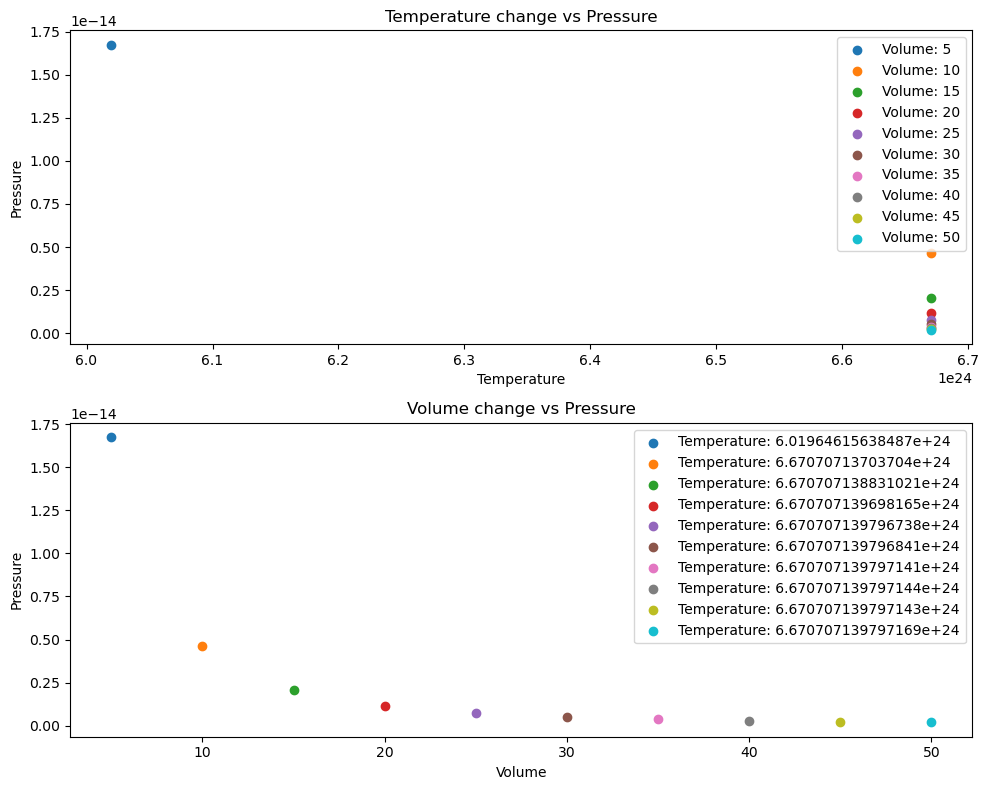

In [14]:
kB = 1.3806452e-23 # Boltzmann constant
sigma = 0.3345e-9 # Length scale
epsilon = 125.7*kB # Energy scale
tau = np.sqrt(sigma**2 / epsilon) # Time scale

num_particles = 300

dim = 3
dt = 0.00001
num_steps = 5000

L = np.array([500, 500, 500])
particle_system = ParticleSystem(num_particles, dim, dt, num_steps, L)

box_volumes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50] # list of box volumes and gas temperatures for exploration

gas_temperatures = [1, 2, 3]

results = []  # List to store results of simulations
simulated_volumes = {} # Dictionary to keep track of simulated volumes

for volume in box_volumes: # Iterate over box_volumes and gas_temperatures
    for temperature in gas_temperatures:
        np.random.seed() # Seed random number generator for reproducibility
        particle_system.L = np.array([volume, volume, volume]) # Set simulation box size

        if volume in simulated_volumes:
            continue # Skip if volume has already been simulated
        
        initial_position = np.random.rand(num_particles, dim) * volume  # Generate initial particle positions uniformly within the volume
        particle_system.initialize_particles(initial_position)
        pressure, temperature = particle_system.simulate2() # Run simulation to obtain pressure and temperature
        results.append((volume, temperature, pressure)) # Store results

        simulated_volumes[volume] = True # Mark volume as simulated
    

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for volume, temperature, pressure in results: # Plot Pressure vs Temperature
    axs[0].scatter(temperature, pressure, label=f'Volume: {volume}')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Pressure')
axs[0].legend()
axs[0].set_title("Temperature change vs Pressure")

for volume, temperature, pressure in results: # Plot Pressure vs Volume
    axs[1].scatter(volume, pressure, label=f'Temperature: {temperature}')
axs[1].set_xlabel('Volume')
axs[1].set_ylabel('Pressure')
axs[1].legend()
axs[1].set_title("Volume change vs Pressure")

plt.tight_layout()
plt.show()